### 必要なライブラリをインポートする

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 2つの列ベクトルを定義それらを結合したものを独立変数、特定の回帰式を従属変数、ノイズを設定しそれらをファイルに保存する

In [35]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, size=(observations,1))

generated_inputs =np.column_stack([xs, zs])

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro.npz',inputs=generated_inputs,targets=generated_targets)#npzファイルで保存


### npzファイルをロード

In [36]:
training_data = np.load('TF_intro.npz')


### インプット数、アウトプット数を定義し、モデルを作成する。その後最適化アルゴリズムと損失関数を設定しコンパイルした後、フィットさせて値を求める

In [38]:
input_size = 2
output_size = 1

model=tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                          ])
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['targets'] ,epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 850us/step - loss: 34.4043
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6784
Epoch 3/100
32/32 [==============================] - 0s 931us/step - loss: 1.4834
Epoch 4/100
32/32 [==============================] - 0s 737us/step - loss: 0.6704
Epoch 5/100
32/32 [==============================] - 0s 727us/step - loss: 0.4243
Epoch 6/100
32/32 [==============================] - 0s 887us/step - loss: 0.3618
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3460
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3424
Epoch 9/100
32/32 [==============================] - 0s 967us/step - loss: 0.3402
Epoch 10/100
32/32 [==============================] - 0s 810us/step - loss: 0.3382
Epoch 11/100
32/32 [==============================] - 0s 848us/step - loss: 0.3344
Epoch 12/100
32/32 [==============================] - 0s 831us/step - loss: 0.3327
Epoch 13/100
32/32

### モデルの重み、バイアスを調べる

In [40]:
model.layers[0].get_weights()

[array([[ 1.969681],
        [-3.012638]], dtype=float32),
 array([4.9464965], dtype=float32)]

### モデルのバイアスを調べる

In [42]:
bias =model.layers[0].get_weights()[1]
bias

array([4.9464965], dtype=float32)

### モデルをもとにテストデータを与え、値を予測する

In [44]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-16.3],
       [ 34.2],
       [-11.9],
       [ 38.9],
       [  7.5],
       [-29.1],
       [ -1.8],
       [-12.4],
       [  3.7],
       [ -0.9],
       [ 25.8],
       [ 44.5],
       [-27.6],
       [  3. ],
       [ 10.5],
       [ -4.1],
       [-19.6],
       [-17.3],
       [ 32.7],
       [ 43.2],
       [ 41.2],
       [ 19.2],
       [ 21. ],
       [  4.1],
       [ -6.6],
       [-10.4],
       [-20. ],
       [-26.9],
       [  4.2],
       [ 40. ],
       [  6.2],
       [ 22. ],
       [ -1.8],
       [ 32.3],
       [-35.4],
       [ 30.5],
       [  0.9],
       [-10. ],
       [  1.4],
       [ -3.2],
       [ 10. ],
       [ -5.4],
       [-23.7],
       [-14.7],
       [-16.9],
       [ -4. ],
       [-19.4],
       [ 11.7],
       [ 12.4],
       [ 32.8],
       [-12.3],
       [-18.2],
       [-10.4],
       [  9.1],
       [-14.6],
       [  7.9],
       [  8.8],
       [  5.9],
       [-32.9],
       [ 31.1],
       [-18.9],
       [  9.2],
       [

In [45]:
training_data['targets'].round(1)

array([[-16.2],
       [ 33.4],
       [-12.8],
       [ 38.4],
       [  8.2],
       [-29.2],
       [ -2.4],
       [-11.6],
       [  4.3],
       [ -1.2],
       [ 25.4],
       [ 44.1],
       [-27.1],
       [  3. ],
       [  9.8],
       [ -4.8],
       [-19. ],
       [-16.8],
       [ 32.4],
       [ 43.5],
       [ 40.5],
       [ 19.6],
       [ 21.6],
       [  3.1],
       [ -6.3],
       [-10.9],
       [-21. ],
       [-26.4],
       [  4.5],
       [ 39.3],
       [  5.7],
       [ 22.6],
       [ -1.4],
       [ 33.2],
       [-35.6],
       [ 29.6],
       [  0.4],
       [ -9.2],
       [  1.2],
       [ -4.1],
       [  9.8],
       [ -5.3],
       [-24. ],
       [-13.8],
       [-17. ],
       [ -3.5],
       [-19.9],
       [ 12. ],
       [ 12.3],
       [ 32.3],
       [-11.4],
       [-18.2],
       [-10. ],
       [ 10.2],
       [-14.3],
       [  7.5],
       [  9.1],
       [  5.9],
       [-33.9],
       [ 31.2],
       [-19.1],
       [  8.9],
       [

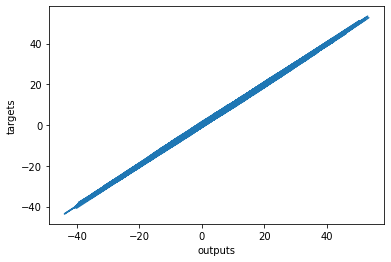

In [17]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()